In [8]:
!pip3 install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 11.3 MB 2.3 MB/s eta 0:00:01    |█████████████▎                  | 4.7 MB 2.1 MB/s eta 0:00:04
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
     |████████████████████████████████| 17.0 MB 2.0 MB/s eta 0:00:01    |███████████████                 | 7.9 MB 2.4 MB/s eta 0:00:04
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a

In [2]:
!pip3 install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 7.2 MB 348 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 160 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 473 kB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://g

In [3]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# load teet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,corpus,cleaned_tweet
0,2021-05-31 23:59:42+00:00,Good project \n#BSC @DinoSour #NFT\n@yamin_rah...,good project
1,2021-05-31 23:59:40+00:00,@AromaFinance Great project!\n\n$reset #bsc #B...,great project reset
2,2021-05-31 23:59:35+00:00,Such a beautiful project and congratulations t...,such a beautiful project and congratulations t...
3,2021-05-31 23:58:47+00:00,I am participating in the CryptoUltraman NFT a...,nice to find this project this project will be...
4,2021-05-31 23:58:44+00:00,@apenftorg @CoinMarketCap Nice to find this pr...,great project
...,...,...,...
407484,2021-02-01 11:31:45+00:00,$DENA #NFT #Defi #YieldFarming\nGreat \n@lensa...,NaN
407485,2021-02-01 11:05:55+00:00,@SMATOOS_now @bagasadys @airdrophunter78 @jher...,NaN
407486,2021-02-01 10:49:53+00:00,@SMATOOS_now @bagasadys @airdrophunter78 @jher...,NaN
407487,2021-02-01 09:29:19+00:00,@ZthCrypto @AlienWorlds How are NFT rates dete...,NaN


In [17]:
'''
Set up DataFrame by reading in data, renaming columns, and adding date columns.

@return DataFrame
'''
# read in data produced by topic_modelling.ipynb
# df = pd.read_csv('../datain/sentiment/grouped-by-topic_with_date.csv')
# df = df[['Unnamed: 0', 'created_at', 'maxtopic', 'corpus', "cleaned_tweet"]].copy()
# df = df.rename({'Unnamed: 0': 'tweet_index'}, axis=1)

# remove any null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

df

,created_at,corpus,cleaned_tweet,date,time
0,2021-05-31 23:59:42+00:00,Good project \n#BSC @DinoSour #NFT\n@yamin_rah...,good project,2021-05-31,23:59:42
1,2021-05-31 23:59:40+00:00,@AromaFinance Great project!\n\n$reset #bsc #B...,great project reset,2021-05-31,23:59:40
2,2021-05-31 23:59:35+00:00,Such a beautiful project and congratulations t...,such a beautiful project and congratulations t...,2021-05-31,23:59:35
3,2021-05-31 23:58:47+00:00,I am participating in the CryptoUltraman NFT a...,nice to find this project this project will be...,2021-05-31,23:58:47
4,2021-05-31 23:58:44+00:00,@apenftorg @CoinMarketCap Nice to find this pr...,great project,2021-05-31,23:58:44
...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,$DENA #NFT #Defi #YieldFarming\nGreat \n@lensa...,NaN,2021-02-01,11:31:45
407485,2021-02-01 11:05:55+00:00,@SMATOOS_now @bagasadys @airdrophunter78 @jher...,NaN,2021-02-01,11:05:55
407486,2021-02-01 10:49:53+00:00,@SMATOOS_now @bagasadys @airdrophunter78 @jher...,NaN,2021-02-01,10:49:53
407487,2021-02-01 09:29:19+00:00,@ZthCrypto @AlienWorlds How are NFT rates dete...,NaN,2021-02-01,09:29:19


In [44]:
dates = df.groupby('date').count()
dates['day'] = ''
for i in range(0, len(dates.index)):
    dates['day'][i] = dates.index[i].day

dates

/var/folders/sx/4r548nsj58s0_cc4jj_vs37h0000gn/T/ipykernel_2691/760936534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['day'][i] = dates.index[i].day


,created_at,corpus,cleaned_tweet,time,day
date,,,,,
2021-02-01,8,8,0,8,1
2021-02-02,9,9,0,9,2
2021-02-03,13,13,0,13,3
2021-02-04,3,3,0,3,4
2021-02-05,7,7,0,7,5
...,...,...,...,...,...
2021-05-27,6417,6417,6415,6417,27
2021-05-28,9037,9037,9035,9037,28
2021-05-29,7751,7751,7750,7751,29


Text(0.5, 1.0, 'Tweet Frequency over time: 1 Feb - 31 May')

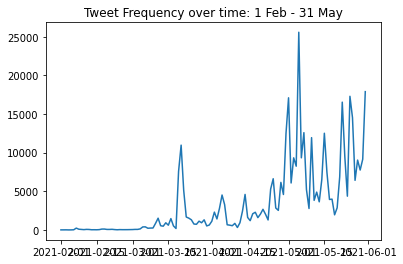

In [66]:
plt.plot(dates.index, dates['corpus'])
plt.title('Tweet Frequency over time: 1 Feb - 31 May')

In [59]:
dates2 = dates[89:120]
dates2

,created_at,corpus,cleaned_tweet,time,day
date,,,,,
2021-05-01,17097,17097,17097,17097,1
2021-05-02,6076,6076,6076,6076,2
2021-05-03,9330,9330,9330,9330,3
2021-05-04,8247,8247,8247,8247,4
2021-05-05,25580,25580,25579,25580,5
2021-05-06,9330,9330,9330,9330,6
2021-05-07,12588,12588,12587,12588,7
2021-05-08,5223,5223,5222,5223,8
2021-05-09,2775,2775,2775,2775,9


Text(0.5, 1.0, 'May: Tweet Frequency over time')

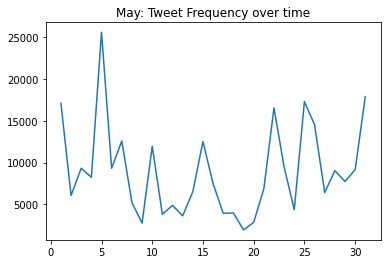

In [60]:
plt.plot(dates2['day'], dates2['corpus'])
plt.title('May: Tweet Frequency over time')

In [32]:

#plot tweet frequency over time
plt.plot(dates['day'], dates['cleaned_tweet'])
plt.title('Tweet Frequency over time')
plt.xlabel('Day in month 2021')
plt.ylabel('Number of Tweets')
plt.savefig('../dataout/general/Total_tweet_frequency.jpeg')
plt.close()

In [7]:
run()